# mini Regression Project

# import required library

In [1]:
#import required library
import numpy as np #for numerical calculation
import pandas as pd # for data analysis
import matplotlib.pyplot as plt # for ploting visual
import seaborn as sb # for visualization
import warnings # to ignore warning notification
warnings.filterwarnings('ignore')

# importing data set

In [2]:
df=pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv') #dataset
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


# Data Structure

In [3]:
df.shape

(1338, 8)

In [5]:
df.shape # shape of the dataset

(1338, 8)

In [3]:
df.shape

(1338, 8)

In [6]:
df.sample(3) # samle dataset

,age,sex,bmi,classif,children,smoker,region,charges
935,59,female,27.50,PREO,0,no,southwest,12233.8280
95,28,female,37.62,OB2,1,no,southeast,3766.8838
1196,19,female,30.02,OB1,0,yes,northwest,33307.5508


In [7]:
df.columns #column names

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

# Data Summary

In [8]:
df.info() # to find data info and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [ ]:
sb.heatmap()

<Axes: >

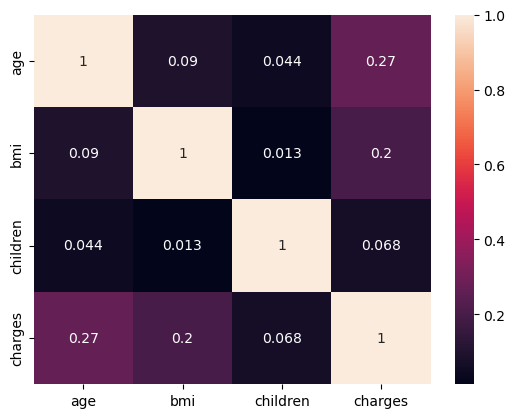

In [9]:
sb.heatmap(df.corr(),annot=True) #correlaion

# Data Cleaning

In [10]:
df.isnull().sum() # to find null value and data set has 8 null value in classif

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

# We have null value in classif so we need to treat it

In [9]:
df['classif'].unique() #unique value of classification

array(['PREO', 'OB1', 'N', 'OB2', 'OB3', nan, 'UW'], dtype=object)

# droping the null value in the data set

In [11]:
df.dropna(inplace=True) # Droping null values

In [12]:
df.isnull().sum() # now data is clean and has no null value

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.shape # data size after treating null value

(1330, 8)

# EDA

In [ ]:
sbb.pariplot(df,kind='reg')

In [ ]:
sb.pairplot(df,kind='reg')

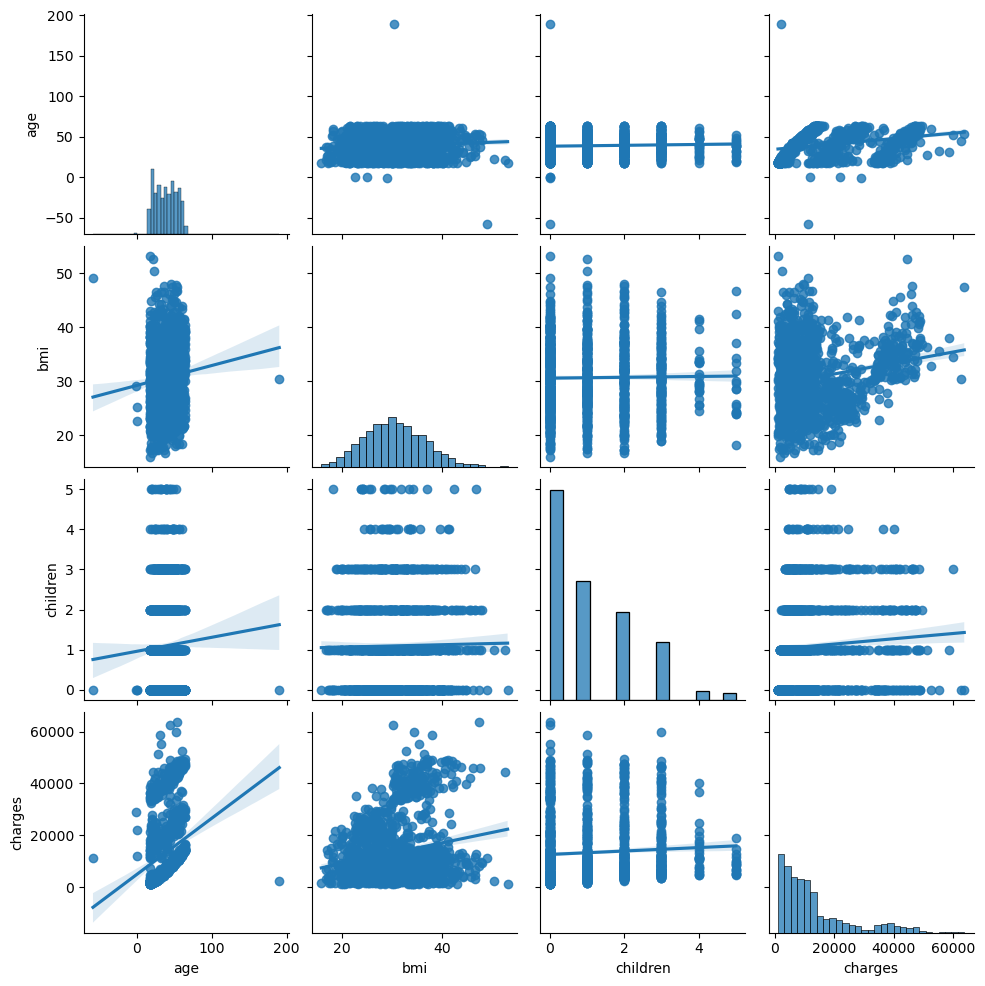

In [15]:
sb.pairplot(df,kind='reg') # data visualizaation on scatter plot

# Univariate Analysis

# Separating categorical and numerical variables

In [16]:
def seprate_data_type(df): # creating def function to divide cat and numerical datatype
    cat=[] # categorical datatype
    con=[] # numerical datatype
    for column in df.columns:
        if df[column].nunique() <40:
            cat.append(column)
        else:
            con.append(column)
    return cat,con

cat,con=seprate_data_type(df)

from tabulate import tabulate # to print in table format
table=[cat,con]
print(tabulate({'categorical':cat,
               'continuous':con},headers=['categorical','continuous']))

categorical    continuous
-------------  ------------
sex            age
classif        bmi
children       charges
smoker
region


# Categorical

# Gender wise count of customer

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

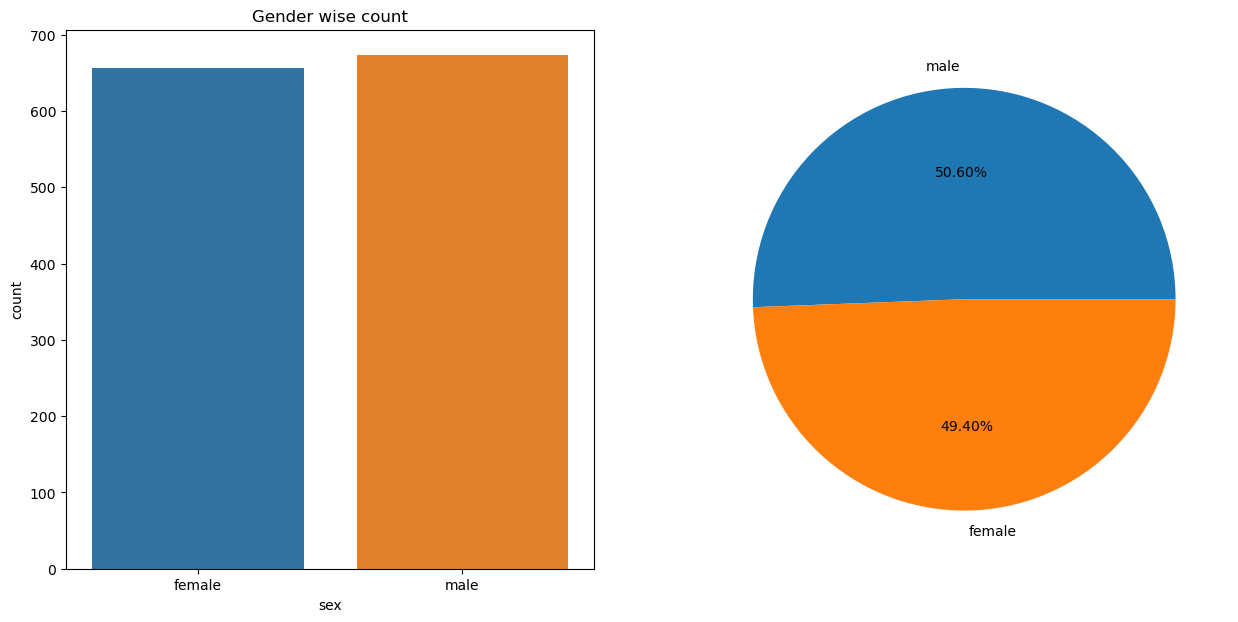

In [26]:
mnn



TypeError: 'Index' object is not callable

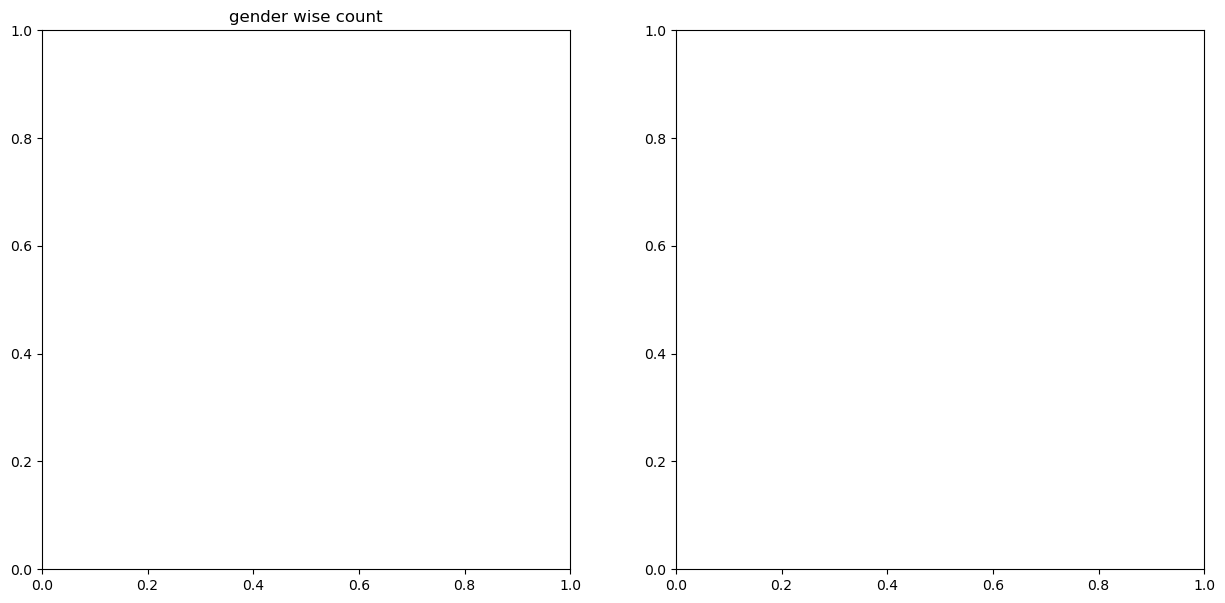

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('gender wise count')
percentage=df['sex'].value_counts()
labels=df['sex'].value_counts().index()
sb.countplot(x=df['sex'],ax=ax[0])
plt.pie(percentage,labels=labels,autopct="%0.2%%")

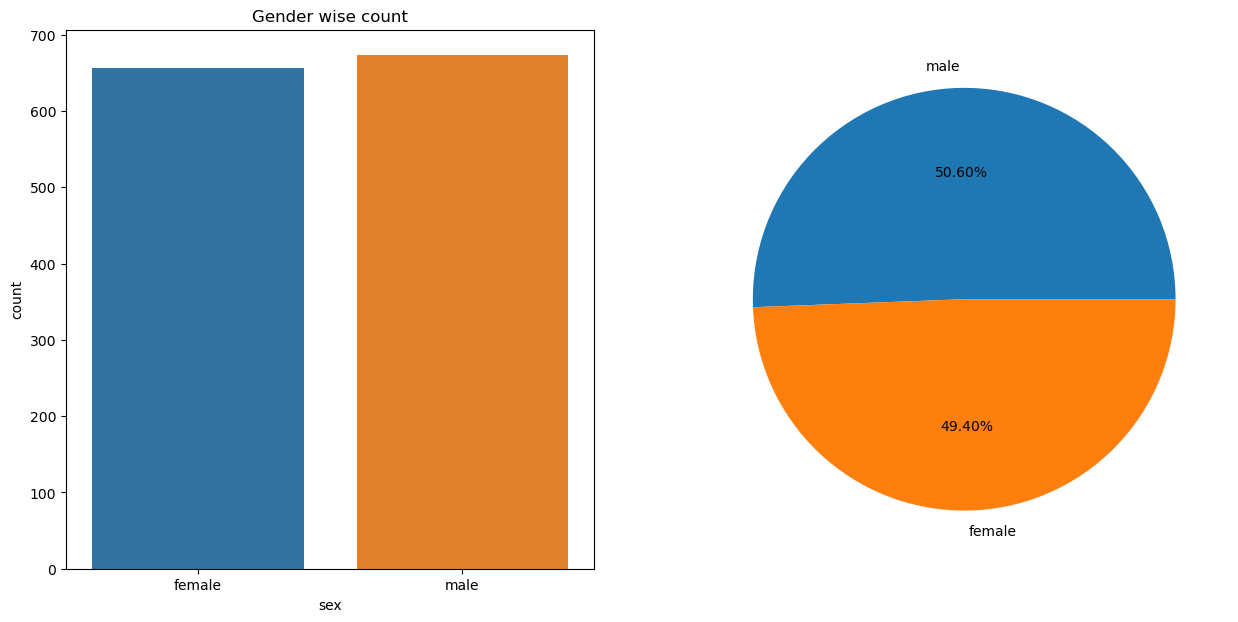

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('Gender wise count')
percentage= df['sex'].value_counts()
labels= list(df['sex'].value_counts().index)

sb.countplot(x=df['sex'],ax=ax[0])
plt.pie(percentage,labels= labels, autopct= "%0.2f%%");

# **Most of the customers are form male gender of about 50.60%**

# Count of Health classification of customer

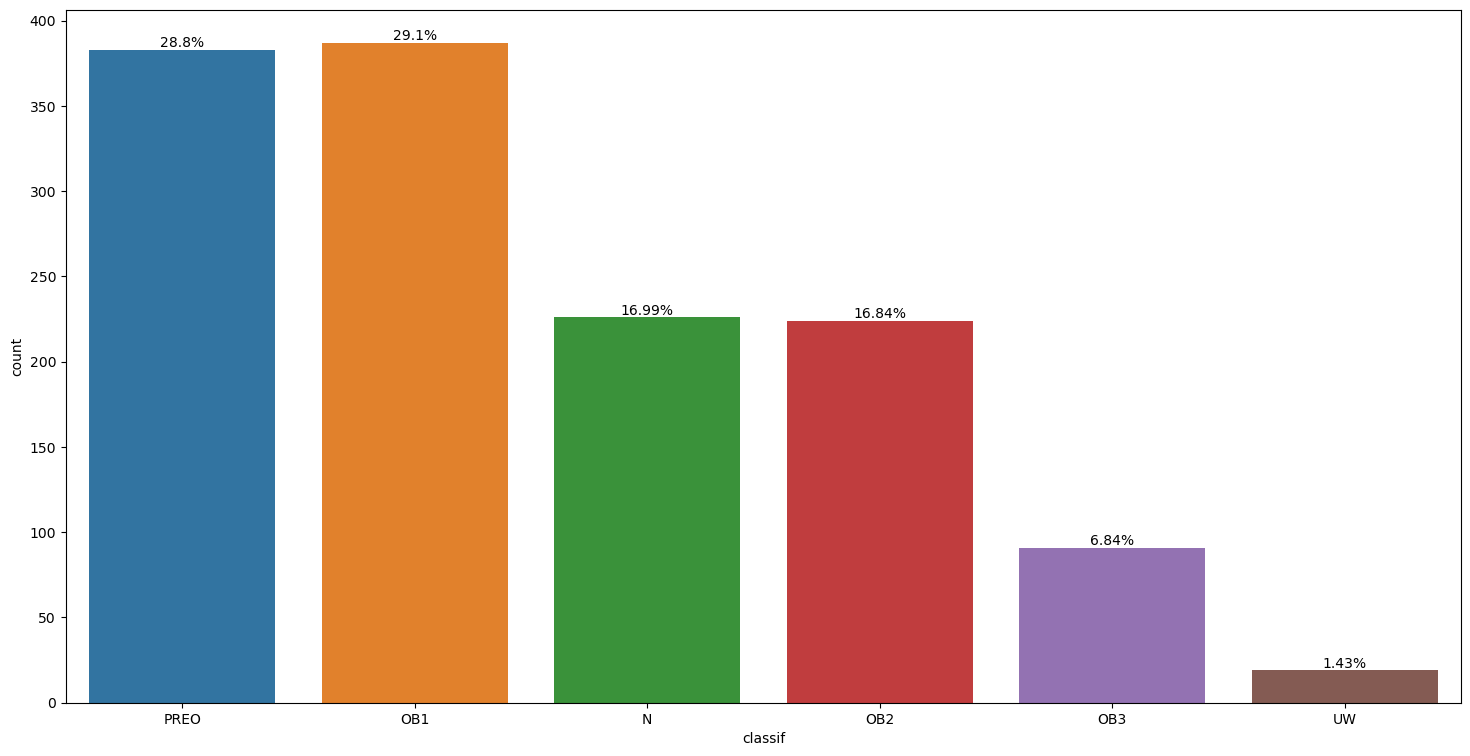

In [28]:
fig,ax=plt.subplots(figsize=(18,9))
ax=sb.countplot(x=df['classif'])
for bar in ax.patches:
    percentage=f"{round((bar.get_height() / len(df))*100,2)}%"
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
    

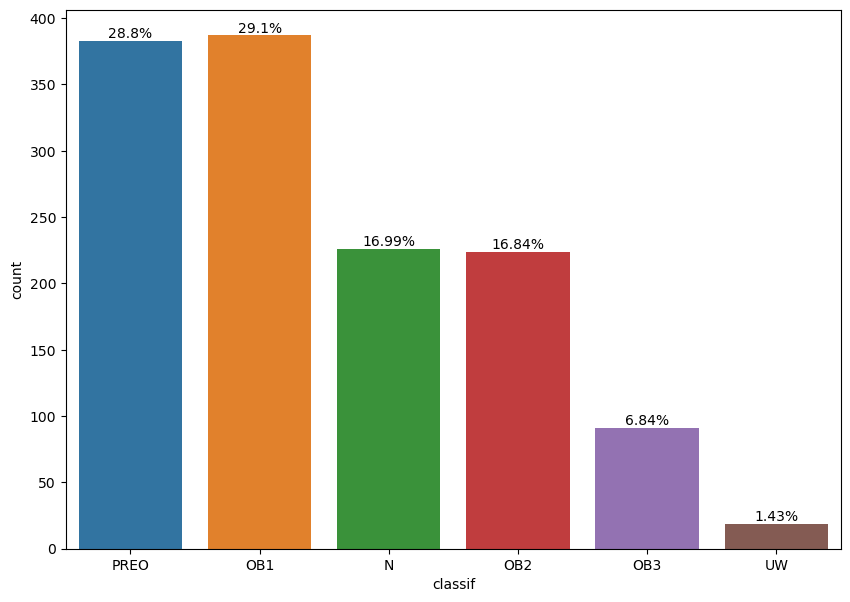

In [20]:
fig,ax= plt.subplots(figsize=(10,7))
ax= sb.countplot(x=df['classif'])
for bar in ax.patches:
    percentage = f"{round((bar.get_height() / len(df))*100, 2)}%"
    
    x= bar.get_x() + bar.get_width() / 2
    y= bar.get_height()
    ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# **OB1 has higest  no of count**

# count of smoker's

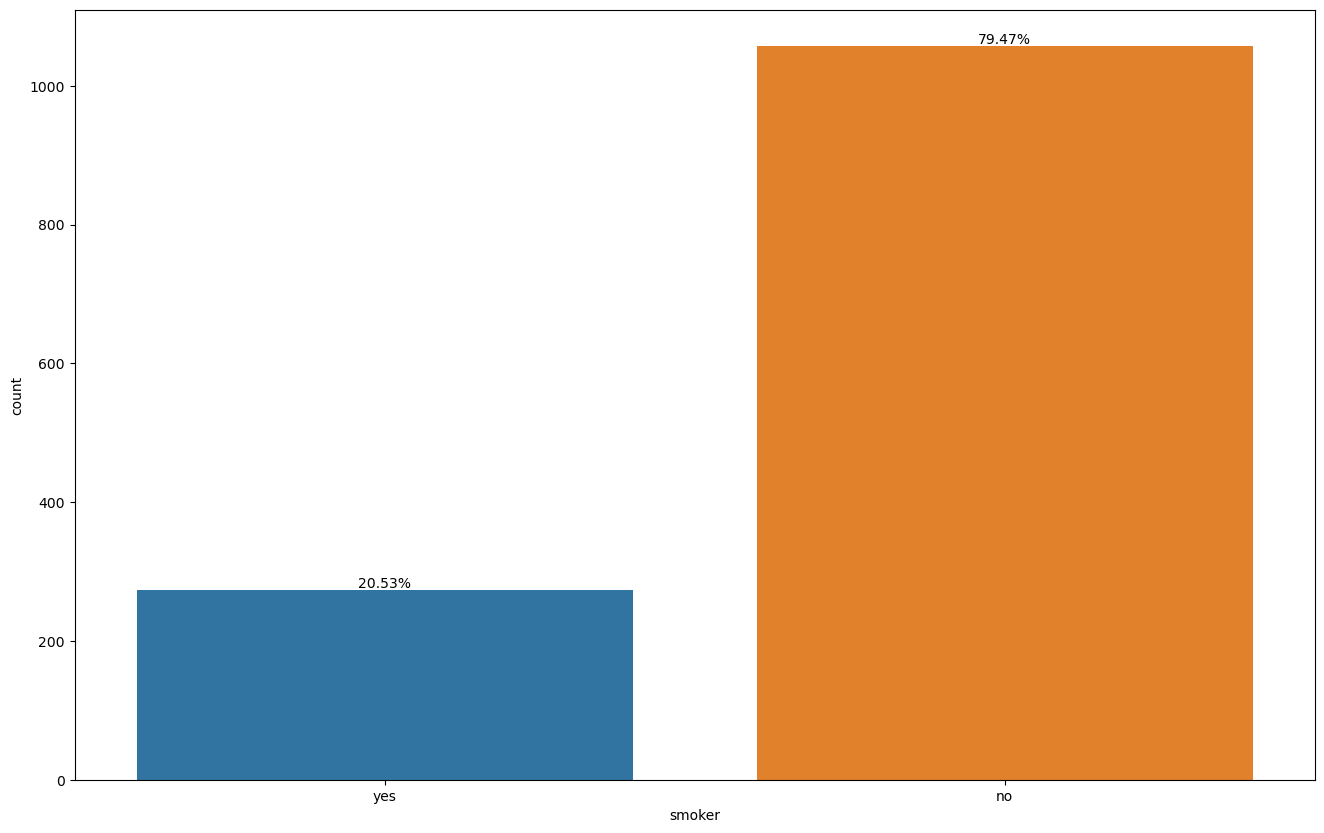

In [18]:
fig,ax=plt.subplots(figsize=(16,10))
ax =sb.countplot(df['smoker'])

for bar in ax.patches:
    percentage=f"{round((bar.get_height() / len(df)*100) , 2)}%"
    
    x= bar.get_x() + bar.get_width()/2
    y= bar.get_height()
    ax.annotate(percentage,(x,y), va='bottom',ha='center')
    
plt.show()

**only few are smoker's**

# Region wise customers

In [29]:
fig,ax=plt.subplots(1,2,figsize=(17,8))
ax=sb.countplot(df['region'])
for bar in ax.patches:
    per=f"{round((bar.get_height() / len(df)*100),2)}%"
    


SyntaxError: incomplete input (1737085911.py, line 3)

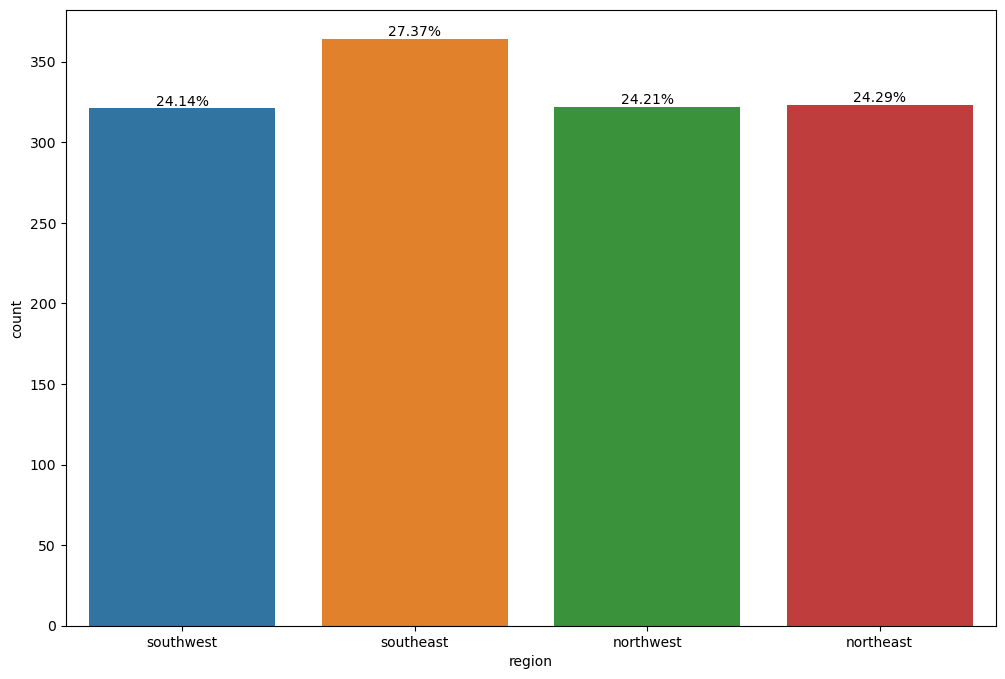

In [19]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sb.countplot(df['region'])

for bar in ax.patches:
    percentage= f"{round((bar.get_height() / len(df)*100),2)}%"
    
    x= bar.get_x() +bar.get_width() / 2
    y= bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

**Most of the customers are from southeast**

# Numerical

In [20]:
def info_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"max of the {col} is {df[col].max()}")
    print(f"min of the {col} is {df[col].min()}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

# Age

In [21]:
info_numerical('age')

The mean of the age is 39.17368421052632
The median of the age is 39.0
The mode of the age is 18
max of the age is 190
min of the age is -58
The standard deviation of the age is 14.961874773065098
Number of missing values in the age is 0


<AxesSubplot:xlabel='age'>

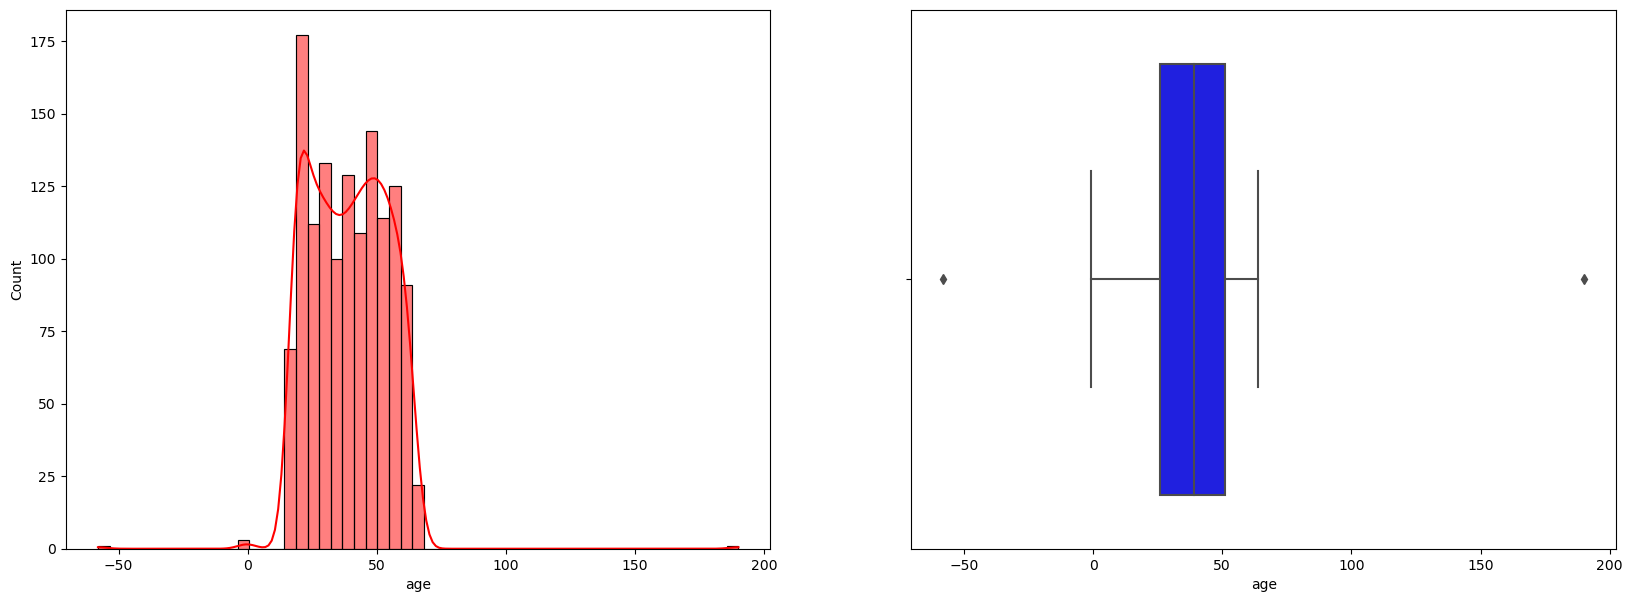

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sb.histplot(df['age'],ax=ax[0],color='r',kde=True)
sb.boxplot(df['age'],ax=ax[1],color='b')

# **in this we find some outerlier over age column

In [23]:
df1=df[(df['age']>(18)) & (df['age']<80)] # we are removing some outlayer

<AxesSubplot:xlabel='age'>

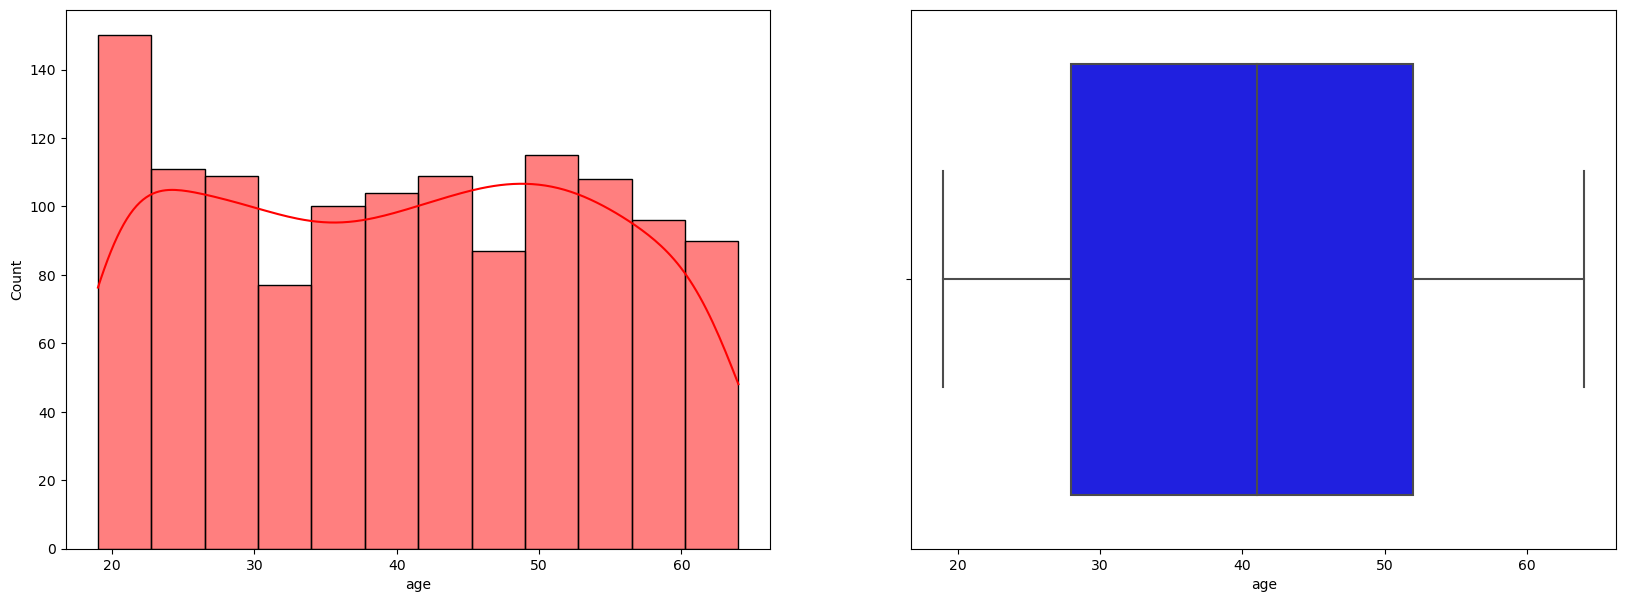

In [24]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sb.histplot(df1['age'],ax=ax[0],color='r',kde=True)
sb.boxplot(df1['age'],ax=ax[1],color='b')

# **data is cleaned now 

In [25]:
info_numerical('bmi')

The mean of the bmi is 30.67039097744359
The median of the bmi is 30.38
The mode of the bmi is 32.3
max of the bmi is 53.13
min of the bmi is 15.96
The standard deviation of the bmi is 6.100324393839767
Number of missing values in the bmi is 0


<AxesSubplot:xlabel='bmi'>

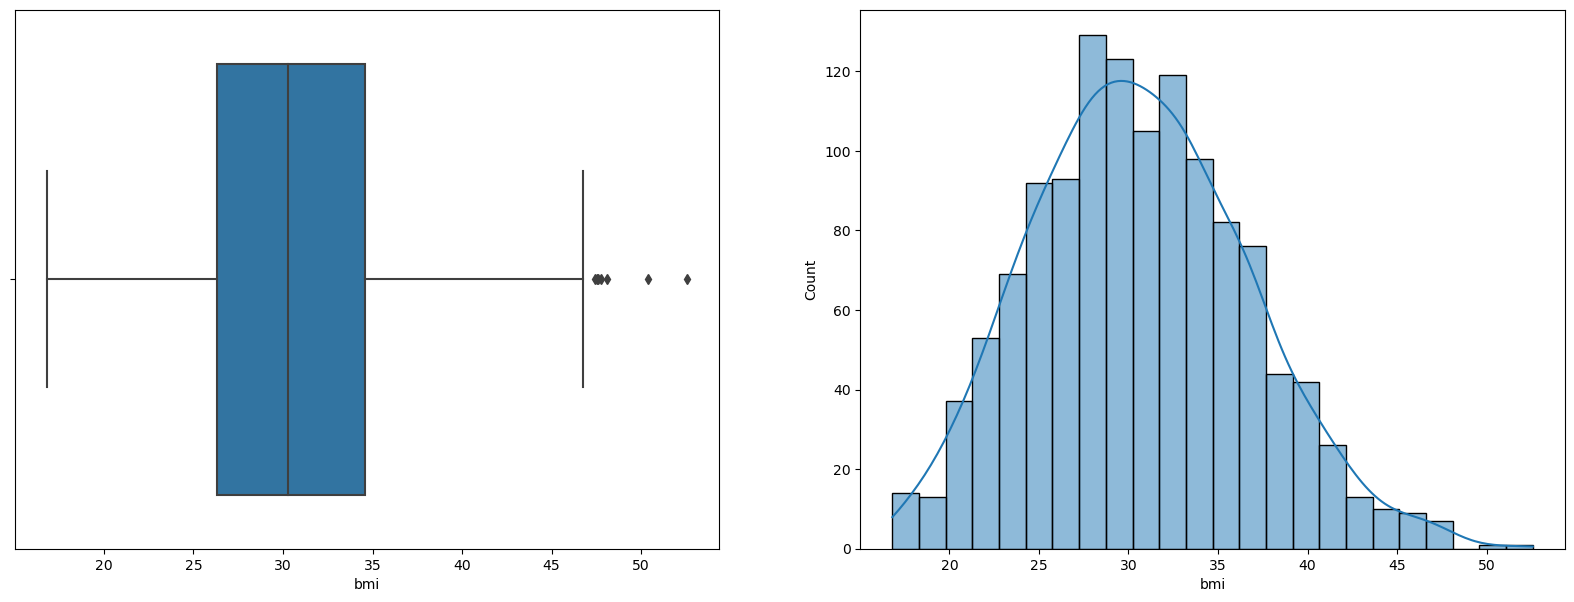

In [26]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sb.histplot(df1['bmi'],ax=ax[1],kde=True)
sb.boxplot(df1['bmi'],ax=ax[0])

# **in this we have some outlayer over 48**

In [27]:
df2=df1[df1['bmi']<45]
df2

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.90,PREO,0,yes,southwest,16884.9240
2,28,male,33.00,OB1,3,no,southeast,4449.4620
4,32,male,28.88,PREO,0,no,northwest,3866.8552
5,31,female,25.74,PREO,0,no,southeast,3756.6216
6,46,female,33.44,OB1,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...,...
1329,52,male,38.60,OB2,2,no,southwest,10325.2060
1330,57,female,25.74,PREO,2,no,southeast,12629.1656
1332,52,female,44.70,OB3,3,no,southwest,11411.6850
1333,50,male,30.97,OB1,3,no,northwest,10600.5483


<AxesSubplot:xlabel='bmi'>

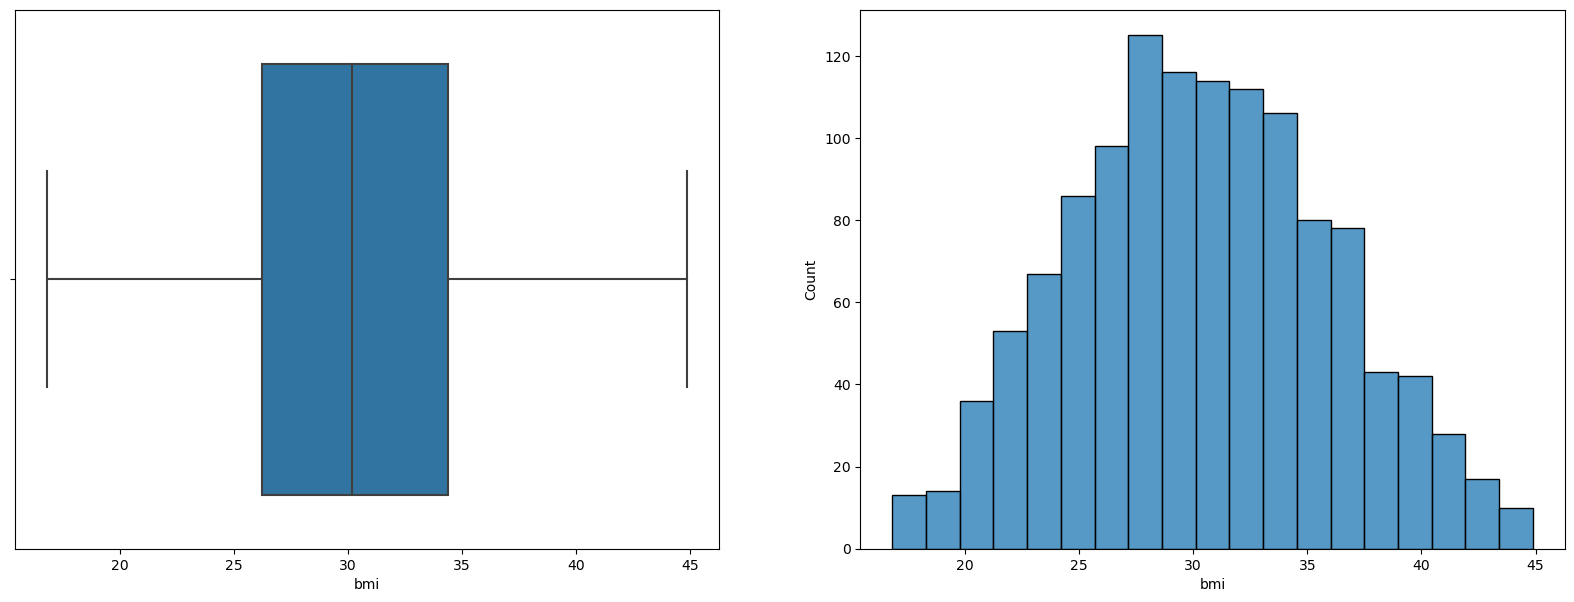

In [28]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sb.histplot(df2['bmi'],ax=ax[1])
sb.boxplot(df2['bmi'],ax=ax[0])

**Now we removed outlayer**

In [29]:
info_numerical('charges')

The mean of the charges is 13292.686108668424
The median of the charges is 9388.753649999999
The mode of the charges is 1639.5631
max of the charges is 63770.42801
min of the charges is 1121.8739
The standard deviation of the charges is 12120.54560179241
Number of missing values in the charges is 0


<AxesSubplot:xlabel='charges'>

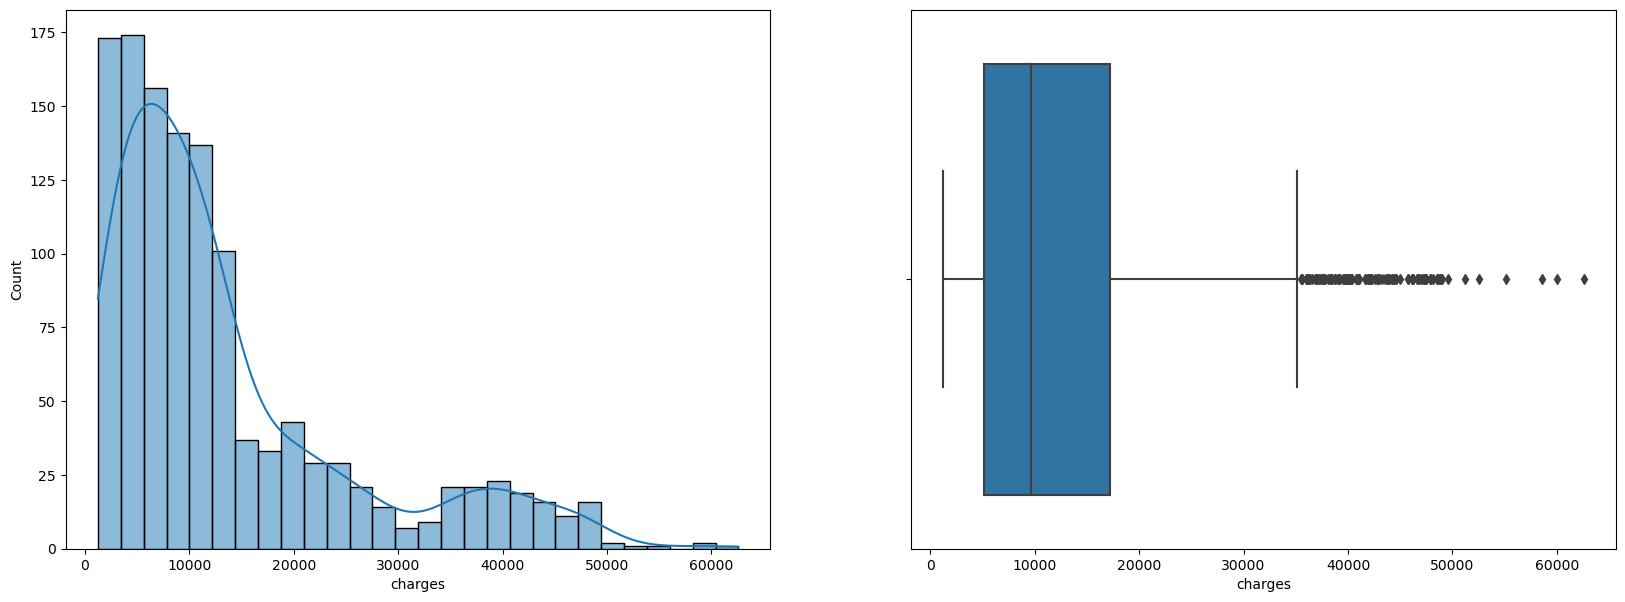

In [30]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sb.histplot(df2['charges'],ax=ax[0],kde=True)
sb.boxplot(df2['charges'],ax=ax[1])

In [31]:
train=df2[df2['charges']<35000]
train.shape

(1113, 8)

In [32]:
test = df2[df2['charges']>35000]
test.shape

(125, 8)

 **I have't removed outlayer for target variable**

# Bi variant analysis

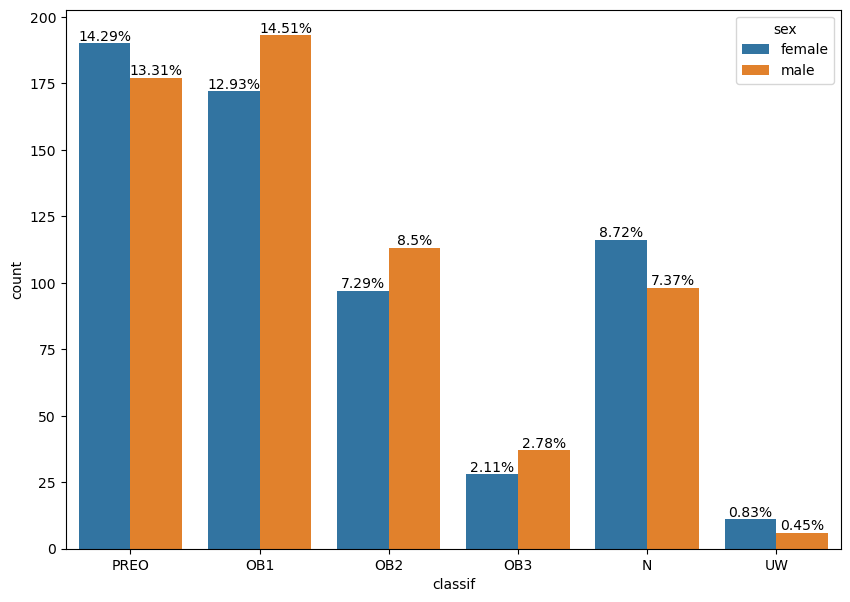

In [33]:
fig, ax =plt.subplots(figsize=(10,7))
sb.countplot(x='classif',hue='sex',data=df2)

for bar in ax.patches:
    percentage= f"{round((bar.get_height() / len(df)*100),2)}%"
    
    x= bar.get_x() +bar.get_width() / 2
    y= bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')
plt.show()

# PREO has more count in female customer
    and OB1 has more count in male customer

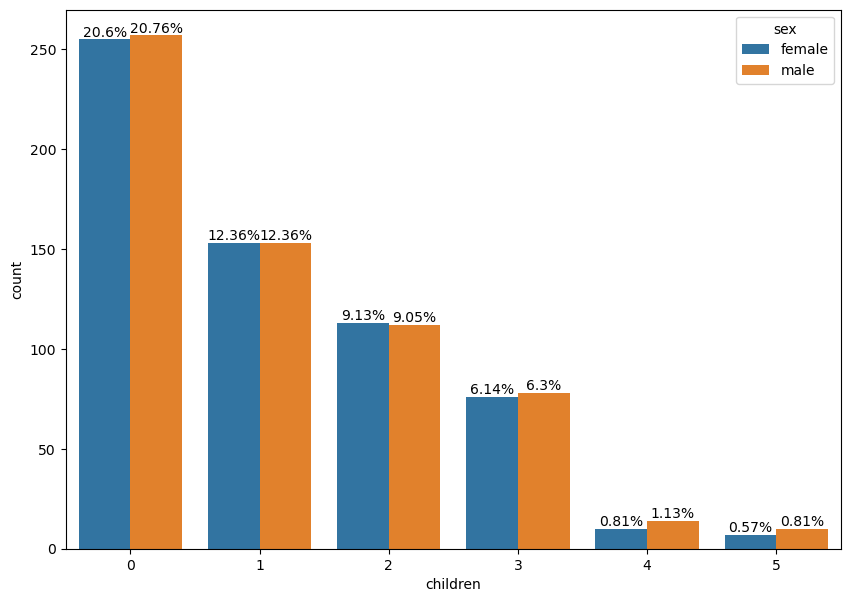

In [34]:
fig,ax=plt.subplots(figsize=(10,7))
sb.countplot(x='children',hue='sex',data=df2)

for bar in ax.patches:
    percentage=f"{round((bar.get_height() / len(df2)*100),2)}%"
    
    x= bar.get_x() + bar.get_width()/2
    y= bar.get_height()
    ax.annotate(percentage,(x,y),va='bottom',ha='center')

# Gender wise customer who has chidren

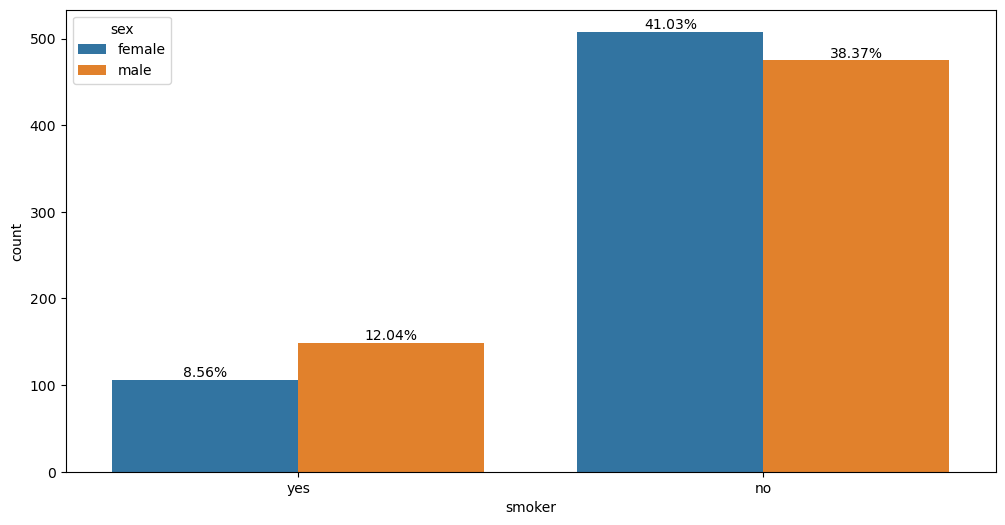

In [35]:
fig,ax=plt.subplots(figsize=(12,6))
sb.countplot(data=df2,x='smoker',hue='sex')

for bar in ax.patches:
    percentage=f"{round((bar.get_height() / len(df2)*100),2)}%"
    
    x=bar.get_x() + bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')

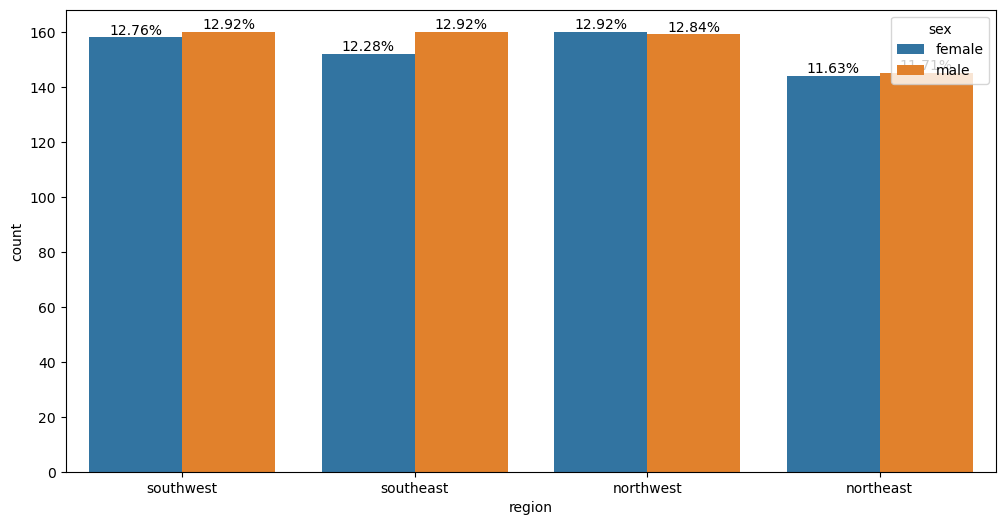

In [36]:
fig,ax=plt.subplots(figsize=(12,6))
sb.countplot(data=df2,x='region',hue='sex')

for bar in ax.patches:
    percentage=f"{round((bar.get_height() / len(df2)*100),2)}%"
    
    x=bar.get_x() + bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='bottom')

# continues bi varient analysis

In [37]:
cat

['sex', 'classif', 'children', 'smoker', 'region']

In [38]:
con

['age', 'bmi', 'charges']

bi varient analysis of age and gender

<AxesSubplot:xlabel='sex', ylabel='age'>

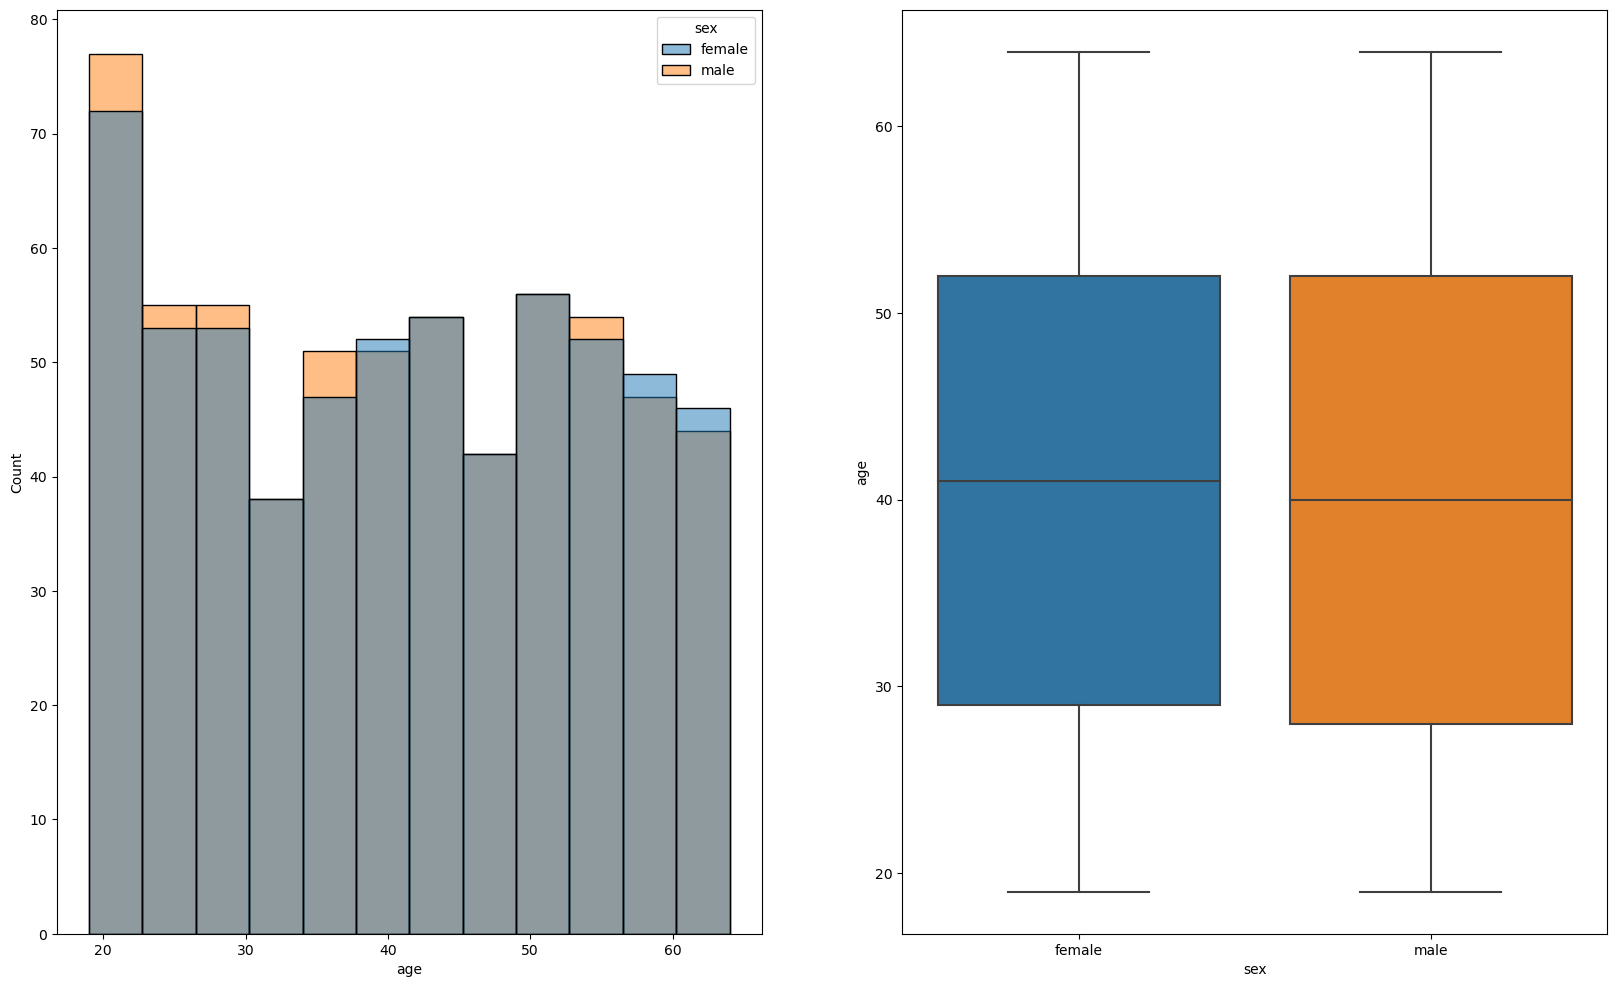

In [39]:
fig, ax = plt.subplots(1,2,figsize=(20,12))
sb.histplot(x= df2['age'],hue=df2['sex'],ax=ax[0],)
sb.boxplot(y=df2['age'],x=df['sex'],ax=ax[1])

bi varient analysis of bmi and gender

<AxesSubplot:xlabel='sex', ylabel='bmi'>

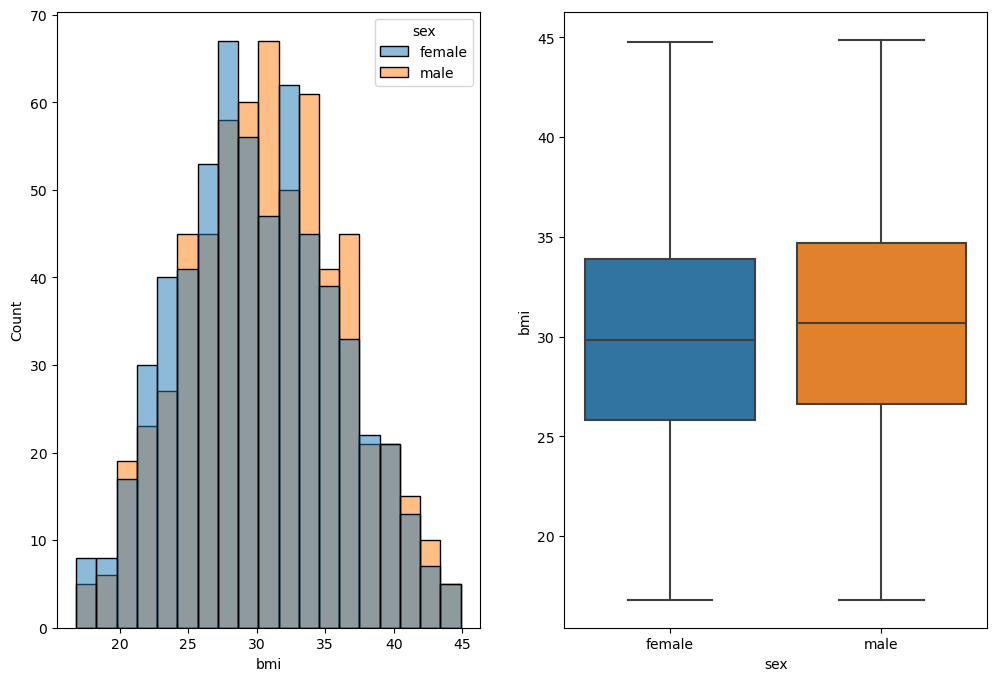

In [40]:
fig,ax= plt.subplots(1,2,figsize=(12,8))
sb.histplot(x=df2['bmi'],hue=df2['sex'],ax=ax[0])
sb.boxplot(y=df2['bmi'],x=df2['sex'],ax=ax[1])

bi varient analysis of charges

<AxesSubplot:xlabel='sex', ylabel='charges'>

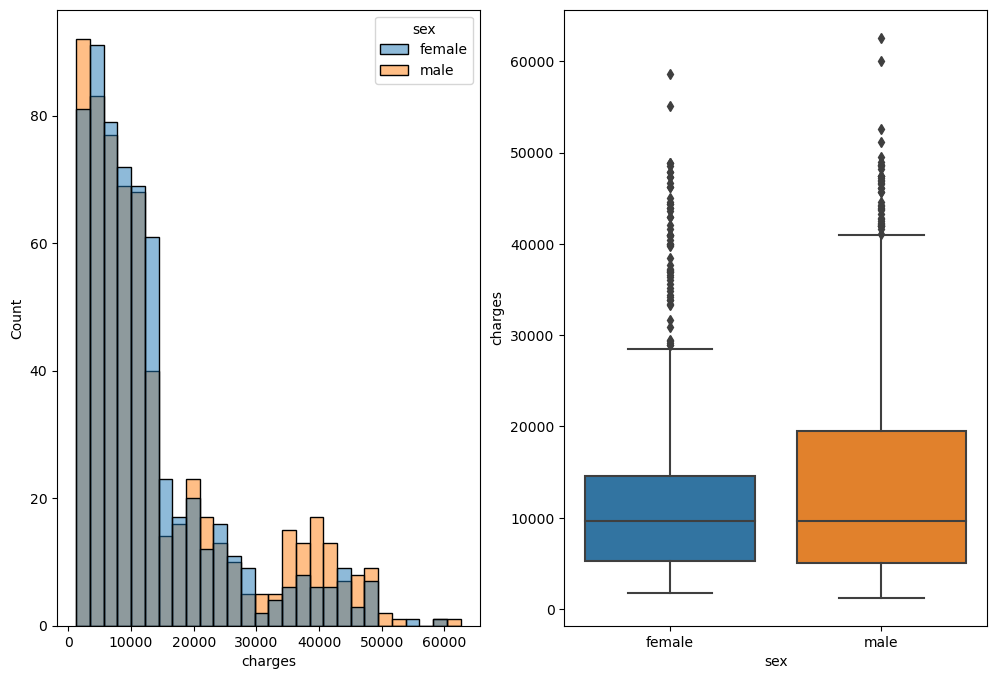

In [41]:
fig,ax= plt.subplots(1,2,figsize=(12,8))
sb.histplot(x=df2['charges'],hue=df2['sex'],ax=ax[0])
sb.boxplot(y=df2['charges'],x=df2['sex'],ax=ax[1])

In [42]:
df2[df2['charges']>25000].shape #size of outlayer data value

(188, 8)

In [43]:
df2.shape

(1238, 8)

# Level 3 analysis

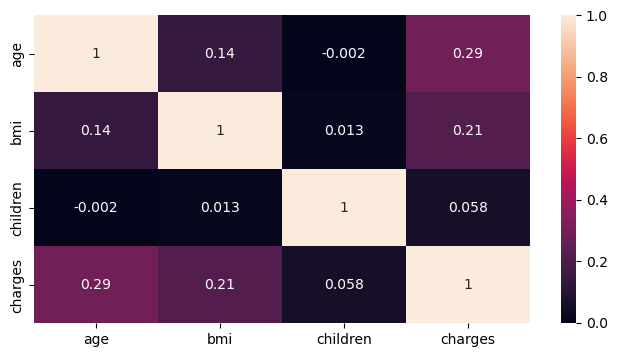

In [44]:
plt.figure(figsize=(8,4)) #multivariant analysis
sb.heatmap(df2.corr(),annot=True);

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1238 non-null   int64  
 1   sex       1238 non-null   object 
 2   bmi       1238 non-null   float64
 3   classif   1238 non-null   object 
 4   children  1238 non-null   int64  
 5   smoker    1238 non-null   object 
 6   region    1238 non-null   object 
 7   charges   1238 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 119.3+ KB


In [46]:
df2.describe()

,age,bmi,children,charges
count,1238.000000,1238.000000,1238.000000,1238.000000
mean,40.399838,30.391591,1.130048,13550.357879
std,13.505503,5.732199,1.212993,11992.283831
min,19.000000,16.815000,0.000000,1241.565000
25%,28.000000,26.220000,0.000000,5128.475950
50%,41.000000,30.205000,1.000000,9623.125350
75%,52.000000,34.372500,2.000000,17166.748020
max,64.000000,44.880000,5.000000,62592.873090


# Label encoder

In [30]:
from sklearn.preprocessing import LabelEncoder # to converting categorical,object column to numerical form train machine learning model

In [31]:
lbl=LabelEncoder() 

In [1]:
data['sex']=lbl.fit_transform(data['sex'])

NameError: name 'lbl' is not defined

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   object 
 2   bmi       1330 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1330 non-null   int64  
 5   smoker    1330 non-null   object 
 6   region    1330 non-null   object 
 7   charges   1330 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.5+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df['sex']=LabelEncoder().fit_transform(df['sex'])

In [37]:
df['sex']=lbl.fit_transform(df['sex'])
df['classif']=lbl.fit_transform(df['classif'])
df['smoker']=lbl.fit_transform(df['smoker'])
df['region']=lbl.fit_transform(df['region'])

In [36]:
df2['sex']=lbl.fit_transform(df2['sex'])
df2['classif']=lbl.fit_transform(df2['classif'])
df2['smoker']=lbl.fit_transform(df2['smoker'])
df2['region']=lbl.fit_transform(df2['region'])

NameError: name 'df2' is not defined

In [50]:
df2.info() # data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1238 non-null   int64  
 1   sex       1238 non-null   int32  
 2   bmi       1238 non-null   float64
 3   classif   1238 non-null   int32  
 4   children  1238 non-null   int64  
 5   smoker    1238 non-null   int32  
 6   region    1238 non-null   int32  
 7   charges   1238 non-null   float64
dtypes: float64(2), int32(4), int64(2)
memory usage: 100.0 KB


In [51]:
df2.describe() #data discription

,age,sex,bmi,classif,children,smoker,region,charges
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,40.399838,0.504039,30.391591,2.046042,1.130048,0.205977,1.532310,13550.357879
std,13.505503,0.500186,5.732199,1.532292,1.212993,0.404577,1.109308,11992.283831
min,19.000000,0.000000,16.815000,0.000000,0.000000,0.000000,0.000000,1241.565000
25%,28.000000,0.000000,26.220000,1.000000,0.000000,0.000000,1.000000,5128.475950
50%,41.000000,1.000000,30.205000,2.000000,1.000000,0.000000,2.000000,9623.125350
75%,52.000000,1.000000,34.372500,4.000000,2.000000,0.000000,3.000000,17166.748020
max,64.000000,1.000000,44.880000,5.000000,5.000000,1.000000,3.000000,62592.873090


# Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler # to normalize the data for further analysis

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [4]:
m=MinMaxScaler()

In [5]:
n=m.fit_transform(df)

ValueError: could not convert string to float: 'female'

In [40]:
m=MinMaxScaler()
s=StandardScaler()

In [18]:
mn= MinMaxScaler() #min max scaler
sc= StandardScaler() #standard scaler

In [19]:
df2.info() # data information after preprocessing

NameError: name 'df2' is not defined

In [55]:
a=mn.fit_transform(df2) # data transformation

# Spliting data set into independent variable and target variable

In [42]:
x=df.drop('charges',axis=1) #independent variable
y=df['charges'] # target variable

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [57]:
from sklearn.model_selection import train_test_split # splitting data into train and test data

In [58]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30) # with 70% train and 30% test data

# Importing models and cross validation

In [45]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score #cross validation

In [46]:
# importing liberary for each model
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [61]:
# object for every model
model_lr= LinearRegression() 
model_dt= DecisionTreeRegressor()
model_KNN= KNeighborsRegressor()
model_ADA= AdaBoostRegressor()
model_RF= RandomForestRegressor()
model_svr= SVR()

In [62]:
# Checking the accuracy of each model to select best model for further prediction
model = [model_lr,model_dt,model_KNN,model_ADA,model_RF,model_svr]
L,D,K,A,R,S = [],[],[],[],[],[]
splits = np.arange(2,11)
for i in splits:
    cv=KFold(n_splits=10,random_state=10,shuffle=True)
    for j in model:
        score = cross_val_score(j,x_train,y_train,cv=cv,n_jobs=-1)
        if j==model_lr:
            L.append(score.mean())
        elif j==model_dt:
            D.append(score.mean())
        elif j==model_KNN:
            K.append(score.mean())
        elif j==model_ADA:
            A.append(score.mean())
        elif j==model_RF:
            R.append(score.mean())
        elif j==model_svr:
            S.append(score.mean())

In [63]:
pd.DataFrame({'n:splits':splits,'Linear_model':L,'Decisiontree':D,'KNN':K,'ADA boositing':A,'Random_Forest_regressor':R,'SVM':S},index=list(range(len(splits))))

,n:splits,Linear_model,Decisiontree,KNN,ADA boositing,Random_Forest_regressor,SVM
0,2,0.736249,0.687791,0.062084,0.801995,0.814082,-0.128723
1,3,0.736249,0.699383,0.062084,0.794947,0.816040,-0.128723
2,4,0.736249,0.699530,0.062084,0.784386,0.816692,-0.128723
3,5,0.736249,0.696780,0.062084,0.790747,0.815583,-0.128723
4,6,0.736249,0.702521,0.062084,0.790165,0.816813,-0.128723
5,7,0.736249,0.691532,0.062084,0.808683,0.813361,-0.128723
6,8,0.736249,0.683693,0.062084,0.800414,0.815802,-0.128723
7,9,0.736249,0.688392,0.062084,0.793493,0.817610,-0.128723
8,10,0.736249,0.698164,0.062084,0.792733,0.818415,-0.128723


**Random Forest Regressor has best accuracy than other model**

So we are using the Random Forest Regressor model for further prediction

In [64]:
model_RF.fit(x_train,y_train)
y_pred=model_RF.predict(x_test)
y_pred

array([ 8947.2679221,  9838.1658517, 44085.6324209,  2095.5831775,
        7696.4644694,  5232.8217399, 44021.7192684,  2012.25508  ,
       18245.4034826, 13292.7489771,  6904.5303438,  7077.9748935,
       12176.0965305,  5814.3707466, 47080.3375145,  9211.9795295,
        4724.1746099,  8830.2090816, 12091.1977931, 15424.9642512,
       16179.4279276, 48492.6720306,  9105.2490512, 13126.6745969,
       20519.489439 ,  7354.8130996, 10495.7372399,  4466.7452643,
        6169.4418636, 14525.1020727, 15759.8125959, 14889.2244508,
        2732.5704955,  5041.3245384,  7455.0106516, 21171.9672275,
        7028.1746782, 17485.4177611, 15435.6488218, 33723.6481615,
       23498.172628 , 12428.980506 , 13122.8284565, 51678.7892417,
       18434.098623 , 12713.4113551, 10662.7063042,  3808.9772785,
       19337.5252205, 20864.7631435, 13041.8750287,  6683.51503  ,
       16720.6009425,  7608.9136637, 19937.1263714, 16542.549757 ,
        4448.1603814,  9133.5325519, 20732.744348 , 11407.8932

In [65]:
avg=np.mean(y_pred)
print('Average Charges for the customer are predicted with test data\navg Charges={}'.format(avg))

Average Charges for the customer are predicted with test data
avg Charges=13473.223521766131


In [ ]:
avg=np.mean()

# Model Evaluation

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [77]:
r2_score(y_test,y_pred) # accuracy

0.8423676844956307

In [66]:
R2=model_RF.score(x_train,y_train)
print('Accuracy of train data is = {}'.format(R2))

Accuracy of train data is = 0.9765790695833193


In [67]:
R3=model_RF.score(x_test,y_test)
print('Accuracy of test data is = {}'.format(R3))

Accuracy of test data is = 0.8423676844956307


# Predicting

In [68]:
df2.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.90,4,0,1,3,16884.9240
2,28,1,33.00,1,3,0,2,4449.4620
4,32,1,28.88,4,0,0,1,3866.8552
5,31,0,25.74,4,0,0,2,3756.6216
6,46,0,33.44,1,1,0,2,8240.5896


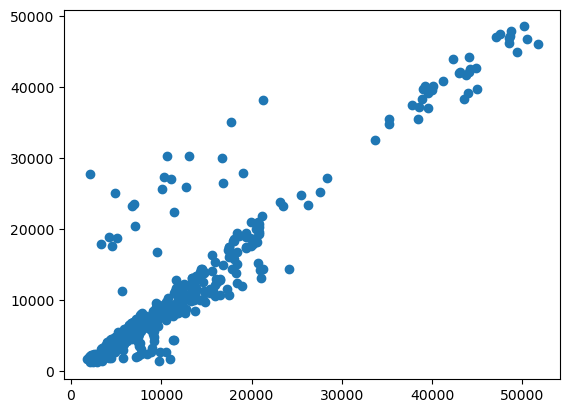

In [69]:
plt.scatter(y_pred,y_test)

In [70]:
sex= {'female':0,'male':1}
clasif= {'PREO':4, 'OB1':1, 'N':2, 'OB2':3, 'OB3':0, 'UW':5}
smoker= {'yes':1, 'no':0}
region= {'southwest':3, 'southeast':2, 'northwest':1, 'northeast':0}

# Predicting with new input variable

In [71]:
# age, gender, bmi, classif, no of children, smoker, region 
model_RF.predict([[25,sex['female'],23,clasif['N'],1,smoker['yes'],region['southwest']]])

array([18259.6911906])

In [72]:
model_RF.predict([[30,sex['male'],32,clasif['OB1'],2,smoker['no'],region['northeast']]])

array([8043.4490933])

In [73]:
model_RF.predict([[40,sex['male'],41,clasif['PREO'],1,smoker['no'],region['southwest']]])

array([7906.6038481])

**The Above Prediction are the charges of new customer with their data**

# Exporting Model

In [74]:
import pickle # to export model in a pickle format to use the model for further prediction

In [1]:
with open('Prediction of Insurance Premium','wb')as f:
    pickle.dump(model_RF,f)

NameError: name 'pickle' is not defined